# 確率過程

この回は東大の鈴木大慈先生の授業「確率数理要論」を参考にしています。参考文献:
* [講義ノート](http://ibis.t.u-tokyo.ac.jp/suzuki/lecture/2022/index.html)
* [舟木確率論](https://www.amazon.co.jp/%E7%A2%BA%E7%8E%87%E8%AB%96-%E8%AC%9B%E5%BA%A7%E6%95%B0%E5%AD%A6%E3%81%AE%E8%80%83%E3%81%88%E6%96%B9-20-%E8%88%9F%E6%9C%A8-%E7%9B%B4%E4%B9%85/dp/4254116004)

``確率過程``は確率論で扱われる重要なトピックです。現実世界でも様々な現象が確率過程としてモデル化できます。

---

**定義：確率過程**

時間域を$T$とする。例えば $T=\mathbb{R_+}$ならこれは連続時間で、$T=\mathbb{Z_+}$なら離散時間である。
任意の $t \in T$について、$X_t: \Omega \to S$ が可測であるとき、$X=(X_t)_{t\in T}$ を確率過程と呼ぶ。
ここで、Sは 状態空間 (例えば $S=\mathbb{R}, \mathcal{B}_S = \mathcal{B}(\mathbb{R})$ は連続状態）である。

---

今回は、その中でも重要なPoisson過程とGauss過程について学びます。

# Poisson Random Measure と Poisson過程

Poisson Random MeasureはPoisson過程を定義する上で必要になる測度であり、単体としても重要な測度です。
Poisson Random Measure は``空間上でランダムに発生する事象の件数``のモデリングなどに用いられます。

---

**定義：Poisson Random Measure**

確率変数の族 $X = (X(A))_{A \in \mathcal{B}(\mathbb{R}^d)}$ が次を満たすとき、$X$を平均測度 $\mu$ の Poisson Random Measureという。

1. a.s. $\omega \in \Omega$ において、$X(A)=X(A, \omega)$が$A$の関数として $\sigma$-有限な非負測度になっている。
2. 任意の$E \in \mathcal{B}(\mathbb{R}^d)$ に対し、$X(E)$は平均$\mu(E)$のPoisson分布に従う。
3. 任意の互いに疎な$E_1, \dots, E_n \in \mathcal{B}(\mathbb{R}^d)$ に対し、$X(E_i)$は独立。

---

例えば、日本で起きる交通事故のモデリングを考えてみます。

日本全体で生じる``交通事故の件数`` $Z$ をPoisson分布からサンプルして、その $Z$ 件の交通事故を``発生しやすい場所``の度合いを測る確率測度 $\nu$ に従って各地方に散りばめれば良さそうです。

実際にPythonでPoisson Random Measureを構築してみましょう。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

japan_mean_measure = 110

def area_measure(area: frozenset):
    return {
        frozenset([]): 0,
        frozenset(["東北"]): 10,
        frozenset(["関東"]): 20,
        frozenset(["近畿"]): 80,
        frozenset(["東北", "近畿"]): 90,
        frozenset(["東北", "関東"]): 30,
        frozenset(["関東", "近畿"]): 100,
        frozenset(["東北", "関東", "近畿"]): 110,
    }[area]


def poisson_random_measure():
    # Z個の事故を発生させます
    Z = np.random.poisson(japan_mean_measure)

    # Z個の事故をarea_probabilityに従って各地方に割り当てます
    # 1: 東北, 2: 関東, 3: 近畿　とします
    keys = [1, 2, 3]
    probs = [
        area_measure(frozenset(["東北"])) / japan_mean_measure, 
        area_measure(frozenset(["関東"])) / japan_mean_measure, 
        area_measure(frozenset(["近畿"])) / japan_mean_measure, 
    ]
    accidents = np.random.choice(keys, size=Z, replace=True, p=probs)
    _, num_accidents = np.unique(accidents, return_counts=True)

    # 測度を構築します
    prm = {
        frozenset([]): 0,
        frozenset(["東北"]): num_accidents[0],
        frozenset(["関東"]): num_accidents[1],
        frozenset(["近畿"]): num_accidents[2],
        frozenset(["東北", "近畿"]): num_accidents[0] + num_accidents[2],
        frozenset(["東北", "関東"]): num_accidents[0] + num_accidents[1],
        frozenset(["関東", "近畿"]): num_accidents[1] + num_accidents[2],
        frozenset(["東北", "関東", "近畿"]): np.sum(num_accidents),
    }
    return prm

poisson_random_measure()

{frozenset(): 0,
 frozenset({'東北'}): 9,
 frozenset({'関東'}): 24,
 frozenset({'近畿'}): 83,
 frozenset({'東北', '近畿'}): 92,
 frozenset({'東北', '関東'}): 33,
 frozenset({'近畿', '関東'}): 107,
 frozenset({'東北', '近畿', '関東'}): 116}

``poisson_random_measure``を実行すると、ランダムな測度が返ってくることがわかります。なのでPoisson random measureと呼ばれます。これが先程のPoisson Random Measureの定義を満たしていることを確認しましょう (宿題)。

ようやくPoisson過程の定義ができます。

---

**定義：Poisson過程**

$(\mathbb{R}, \mathcal{B}({\mathbb{R}}))$上の Poisson Random Measure $Y=(Y(A))_{A\in \mathcal{B}(\mathbb{R})}$ を考えて、$X_t(\omega)=Y([0, t])(\omega)$ とする。
このとき、$(X_t)_{t\geq0}$ をPoisson過程と呼ぶ。

特に $\mu([a, b])=\lambda (b - a)$のときに$X$を強度$\lambda$のPoisson過程と呼び、これは一様強度である。

---

Poisson過程は例えば来客数のモデリングなどに使用できます。
試しに$[t, t+10)$について、一様強度 $\lambda$ のPoisson過程を考えてみます。

まず、時刻 $[t, t+10)$ の期待値 $10 \lambda$ に従って、来客数 $Z$ をランダムにサンプルします。
これを各時刻間 $[t, t+1), [t+1, t+2), \dots, [t+9, t+10)$ の期待値に従って散りばめます。今回は全て一様強度のため、一様にばらまきます。

Text(0, 0.5, "$X_t (\\omega)$ for some $\\omega$ due to 'np.random.poisson'")

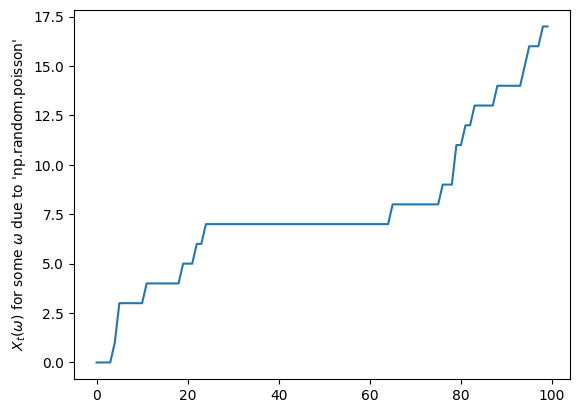

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

lamb = 0.2  # 強度
t = np.arange(0, 100, 1)  # 時刻 [0, 100]
poisson_process = np.zeros(100)

Z = np.random.poisson(lamb * 100)
Y_t = np.random.randint(0, 99, Z)  # Z個の来客を一様にばらまく
for y in Y_t:
    poisson_process[y] += 1
poisson_process = np.cumsum(poisson_process)

plt.plot(t, poisson_process)
plt.ylabel(r"$X_t (\omega)$ for some $\omega$ due to 'np.random.poisson'")

ちなみに、ジャンプの高さについてもランダムに決まるPoisson過程は``Compound ポアソン過程``と呼ばれます。
例えば、Poisson過程のジャンプ点 $\tau_1, \tau_2, \dots$ に対して、適当な分布$F$から独立に $\zeta_1, \zeta_2, \dots$をサンプルして、$\sum^{\infty}_{i=1} \zeta_i \bf{1}\{\tau_i \leq t\}$ とすると、これはCompound ポアソン過程になります。
通常のPoisson過程と異なり、これはジャンプの回数ではなく、ジャンプの累積高さを出力することになります。

Text(0, 0.5, "$X_t (\\omega)$ for some $\\omega$ due to 'np.random.poisson'")

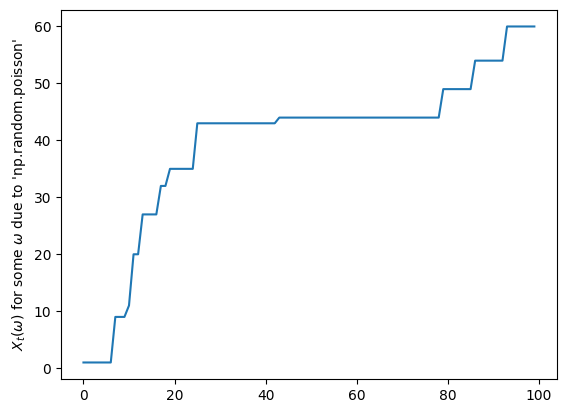

In [4]:
# Compound ポアソン過程
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

lamb = 0.2  # 強度
t = np.arange(0, 100, 1)  # 時刻 [0, 100]
poisson_process = np.zeros(100)

Z = np.random.poisson(lamb * 100)
Y_t = np.random.randint(0, 99, Z)  # Z個の来客を一様にばらまく
for y in Y_t:
    poisson_process[y] += np.random.randint(0, 10)
poisson_process = np.cumsum(poisson_process)

plt.plot(t, poisson_process)
plt.ylabel(r"$X_t (\omega)$ for some $\omega$ due to 'np.random.poisson'")

最後に、より一般的な ``Pure-Jump Levy 過程``を導入しましょう。

---

**定義：Pure-Jump Levy 過程**

* $N: [0, \infty)\times \mathbb{R}$上のPoisson random measure
* $\mu: $ $N$の平均測度とする。$\forall t \geq 0$ において、
    * $\mu (\{t\} \times (\mathbb{R} \setminus \{0\}))=0$  : ある時刻 $t$ でちょうどジャンプする確率は$0$
    * $\int_{S \in [0, t]}\int_{|u| > 0} (u^2 \wedge 1) \mu (dsdu) < \infty$ ： $u=0$付近で無限回ジャンプが発生しても良いが、あまりに多いことは無い。
* $m(t): $ ドリフト項。連続かつ $m(0)=0$。
* $\phi(u)=\max(-1, \min(u, 1))$ ：$u$のクリッピング。これを追加して、$u$の積分が発散しないようにする。これがあると$n\to\infty$が可能になり、$\lim$が概収束する。

この時、
$$
X_t = m(t) + \lim_{n\to \infty} \int_{S \in [0, t]}\int_{|u| \geq \frac{1}{n}} (u N(ds, du) - \phi(u)\mu (ds, du))
$$

---

直感的には, $s$が単位時刻、$u$がジャンプの高さに対応します。また、$\mu(dtdu) = dt dF(u)$の形に書ける時、これはCompound Poisson過程と一緒になります。

# ガウス過程

$T$を一般的な集合とします（$T=\mathcal{R}$ として考えると分かりやすいです。）

---

**定義：ガウス過程**

確率過程 $X = (X_t)_{t\in T}$ が任意の $t_1, \dots, t_n\in T$に対し、$(X_{t_1}, X_{t_2}, \dots, X_{t_n})$が多変量正規分布に従うとき、ガウス過程という。　

* 平均関数: $m(t) = E[X_t]$
* 共分散関数: $k(t, t') = E[(X_t - m(t))(X_{t'} - m(t'))]$

を使って$\mathcal{GP}(m, k)$ と書く。

---

ここで、``多変量正規分布に従う``の定義も与えておきます。

---

**定義：多変量正規分布**

$\mathbb{R}^m$値確率変数 $(X_1, \dots, X_m)$が多変量正規分布に従うとは、$\forall t_1,\dots,t_m \in \mathbb{R}$に対して、$t_1 X_1, + \dots, + t_m X_m$ が$\mathbb{R}$上の正規分布に従うことと定義する。
分散$0$でも正規分布であると言う。
また、
* 平均: $\mu=(\mathbb{E}[X_1], \dots, \mathbb{E}[X_m]) \in \mathbb{R}^m$
* 分散: $\Sigma=(\mathbb{E}[X_i X_j]-\mathbb{E}[X_i]\mathbb{E}[X_j])_{i,j} \in \mathbb{R}^m$

を用いて、$\mathcal{N}(\mu, \Sigma)$と書く。

---

この定義の場合、$\Sigma$がrank落ちしてても大丈夫です（$\Sigma^{-1}$が取れない場合でもOK）。
Poisson過程ではその過程に従う確率変数の構築が簡単にできました（交通事故の件数の例）。では、ガウス過程ではどうすればよいでしょうか？
これを与えるのが ``再生核ヒルベルト空間``や``Mercerの定理``、そして``Karhunen-Loeve展開``です。

---

**定義：再生核ヒルベルト空間 (RKHS)**

集合$T$上のRKHS $\mathcal{H}$ は、$T$上の（実数値）関数からなるヒルベルト空間で、$\forall t\in T$に対して$k_t \in \mathcal{H}$ が存在して、

* 再生性: $\forall f \in \mathcal{H}$ について $\langle f, k(t, \cdot) \rangle_\mathcal{H} = f(t)$ 

が成り立つ$\mathcal{H}$とする。

特に、$k(x, y) = \langle k(x, \cdot), k(y, \cdot) \rangle_\mathcal{H}$ を再生核と呼ぶ。

---

再生核は次の正定値カーネルになっており、「$k$を再生核とするRKHS」は一意に存在します（Moore-Aronszajnの定理）。

---

**定義：正定値カーネル**

次を満たす関数 $k : T \times T \to \mathbb{R}$ を正定値カーネルと呼ぶ。

* 対象: $k(t, s) = k(s, t)$
* 正定値: $\forall \alpha_1, \dots, \alpha_m \in \mathbb{R}$, $\forall t_1, \dots, t_m \in T$について、 $\sum_{1 \leq i, j \leq m} \alpha_i \alpha_j k (t_i, t_j) \geq 0$。

例えば

* 線形カーネル: $(x, y) \in \mathbb{R}^d$ について、$k(x, y) = x^T y$
* ガウスカーネル: $(x, y) \in \mathbb{R}^d$ について、$k(x, y) = \exp(- \frac{1}{2\sigma^2} (x -y)^T (x - y))$

は正定値カーネルである。

---

ここで注意として、RKHSの内積は``ユークリッド空間の内積の定義とは異なります。``
例えば、線形カーネルのRKHSでの内積を考えてみます。
RKHSの内積は$k(x, y) = \langle k(x, \cdot), k(y, \cdot) \rangle_\mathcal{H}$として定義するため、線形カーネルの場合は
$\langle k(x, \cdot), k(y, \cdot) \rangle_\mathcal{H} = \langle x^T\cdot, y^T\cdot \rangle_\mathcal{H} = x^T y$ として定義されます。
これは関数同士の内積 $\int_{\mathcal{R}^d} (x^T s)(y^Ts) ds$ とは異なります。

**実験**

線形カーネルとガウスカーネルが正定値カーネルであることを確かめてみましょう。(証明もしてみましょう)

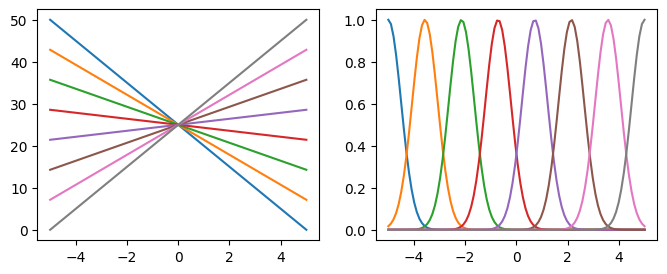

In [5]:
import numpy as np


def linear_kernel(x, y, bias=5):
    x = np.hstack([x, bias])
    y = np.hstack([y, bias])
    return x @ y


def gauss_kernel(x, y, sigma=0.5):
    return np.exp(- 0.5 / sigma ** 2 * (x - y) @ (x - y))


def check_symmetry(kernel):
    # 対称性のチェック
    d = 10
    x = np.random.randn(d)
    y = np.random.randn(d)
    assert kernel(x, y) == kernel(y, x)


def check_positive_definite(kernel):
    # 正定値性のチェック 
    m = 5
    d = 10
    data = np.random.randn(m, d)

    # グラム行列Kの計算
    K = np.zeros(shape=(m, m))
    for i, j in np.ndindex(m, m):
        K[i, j] = kernel(data[i], data[j])
    assert np.all(np.linalg.eigvals(K) > 0)


check_symmetry(linear_kernel)
check_symmetry(gauss_kernel)

check_positive_definite(linear_kernel)
check_positive_definite(gauss_kernel)


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))

y = np.linspace(-5, 5, 8)[:, None]
x = np.linspace(-5, 5, 100)[:, None]

# d = 1 での線形カーネル
plt.subplot(1, 2, 1)
for _y in y:
    res = [linear_kernel(_x, _y) for _x in x]  # k(・, _y)
    plt.plot(x, res)


# d = 1 でのガウスカーネル
plt.subplot(1, 2, 2)
for _y in y:
    res = [gauss_kernel(_x, _y) for _x in x]   # k(・, _y)
    plt.plot(x, res)
plt.show()

---

**補足: Moore-Aronszajnの定理**

Moore-Aronszajnの定理「RKHSが再生核から一意に構築できる」をなんとなく確認してみましょう。

定理の流れは

1. $\mathcal{H}_0 = \{f(\cdot) = \sum^{m}_{j=1} \alpha_j k(\cdot, t_j) | \alpha_j \in \mathbb{R}, t_j \in T, m \in \N\}$ として空間を構築
2. $\mathcal{H}_0$ の元 $f = \sum_{j=1}^{m} \alpha_j k(\cdot, t_j)$, $g = \sum_{j=1}^{m} \beta_j k(\cdot, t_j)$ に対して、$\langle f, g, \rangle_{\mathcal{H}_0} = \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_i\beta_j k(t_i, t_j)$ として内積を定義 ($k$を再生核として定義)
3. これを完備化してRKHSを構築

この$\mathcal{H}_0$の定義に従うと、

* $\beta_j = 1$ とすれば、$\forall f \in \mathcal{H}$ について $\langle f, k(t, \cdot) \rangle_\mathcal{H_0} = \sum \alpha_j k(t_j, t) = f(t)$ 

であり、再生性も構築されています。

---

後でちゃんと確認しますが、ヒルベルト空間の元はカーネル関数の和で表すことができます。

練習として、$T = [-5, 5]$として、適当な重みをカーネル関数に割り当ててカーネル関数の和 (ヒルベルト空間の元) を作ってみましょう。

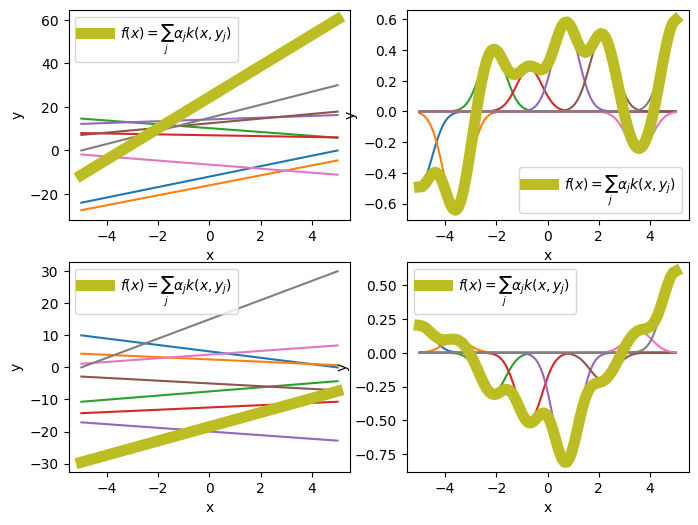

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

y = np.linspace(-5, 5, 8)[:, None]
x = np.linspace(-5, 5, 100)[:, None]
alpha = np.array([-0.48, -0.64, 0.41, 0.28, 0.57, 0.50, -0.26, 0.60])
beta = np.array([0.2, 0.1, -0.3, -0.5, -0.8, -0.2, 0.16, 0.60])


def draw_function_from_kernel(kernel, weight):
    f = np.zeros(100)
    for _y, _a in zip(y, weight):
        res = []
        for i, _x in enumerate(x):
            k_x_y = kernel(_x, _y)  # k(_x, _y)
            res.append(_a * k_x_y)
            f[i] += _a * k_x_y
        plt.plot(x, res)
    plt.plot(x, f, linewidth=8, label=r"$f(x)=\sum_j \alpha_j k(x, y_j)$")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    return f


plt.subplot(2, 2, 1)
f_linear = draw_function_from_kernel(linear_kernel, alpha)
plt.subplot(2, 2, 2)
f_gauss = draw_function_from_kernel(gauss_kernel, alpha)

plt.subplot(2, 2, 3)
g_linear = draw_function_from_kernel(linear_kernel, beta)
plt.subplot(2, 2, 4)
g_gauss = draw_function_from_kernel(gauss_kernel, beta)


今までは再生核ヒルベルト空間の定義を確認し、Moore-Aronszajnの定理によって、再生核ヒルベルト空間の構築方法について学びました。

Moore-Aronszajnの定理では、ヒルベルト空間の元を $\sum^{m}_{j=1} \alpha_j k(\cdot, t_j)$ と、カーネル関数の和の形で表していました。
この和のとり方は一意ではありません（複数の $\alpha_j$ や $m$ の組み合わせがあるかも知れません）。
次のMercerの定理は、より厳密なヒルベルト空間の元の表現を与えます。

---

**定理: Mercerの定理**

$T$をハウスドルフ位相空間（$\mathbb{R}^d$など）、$\nu$を$T$上の非負Borel測度で$\text{supp}(\nu) = T$ とする。ただし、$\forall A \in \mathcal{B}(T)$について$\nu(A) < \infty$とする。

$k$は連続な正定値カーネルで、$\int k(t, t)d\nu(t) < \infty$ とする。

このとき、$k$によって決まるRKHS $\mathcal{H}$は可分で、

* $\mu_1 \geq \mu_2 \geq, \dots, \geq 0$
* $(e_i)_i$: $L^2(\nu)$内の正規直行基底

が存在して、$\forall t \in T$ において、

$$k(t, t') = \sum^\infty_{i=1} \mu_i e_i(t) e_i(t')$$

が$\forall t' \in T$ で絶対収束する。

---

これは、正定値カーネルのグラム行列を無限次元の固有値分解したことと同じです。
つまり、カーネル関数についてのグラム行列$K$について、$K = U\Sigma U^T = \sum^\infty_{i=1}\mu_i e_i e_i^T$ していることと同じです。

実際に確認してみます。

In [7]:
def gauss_kernel(x, y, sigma=0.5):
    return np.exp(- 0.5 / sigma ** 2 * (x - y) @ (x - y))

plt.figure(figsize=(8, 3))

x = np.linspace(-5, 5, 100)[:, None]
#

<Figure size 800x300 with 0 Axes>

/home/toshinori/.cache/pypoetry/virtualenvs/shumi-VTLwuKSy-py3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


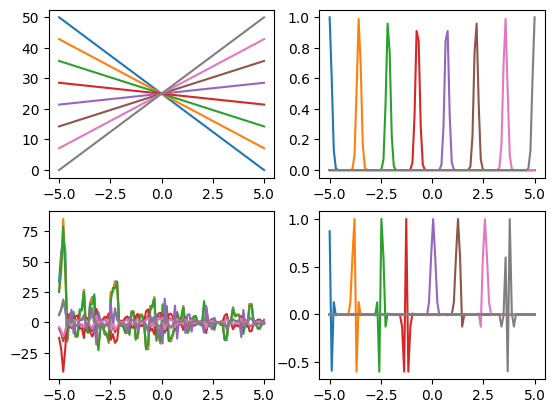

In [19]:
# 多分何か間違ってます...

y_len = 8
x_len = 100

y = np.linspace(-5, 5, y_len)[:, None]
x = np.linspace(-5, 5, x_len)[:, None]


def linear_kernel(x, y, bias=5):
    x = np.hstack([x, bias])
    y = np.hstack([y, bias])
    return x @ y


def gauss_kernel(x, y, sigma=0.1):
    return np.exp(- 0.5 / sigma ** 2 * (x - y) @ (x - y))


# d = 1 での線形カーネル
plt.subplot(2, 2, 1)
for _y in y:
    res = [linear_kernel(_x, _y) for _x in x]  # k(・, _y)
    plt.plot(x, res)


# d = 1 でのガウスカーネル
plt.subplot(2, 2, 2)
for _y in y:
    res = [gauss_kernel(_x, _y) for _x in x]   # k(・, _y)
    plt.plot(x, res)


# 分解して再構築した線形カーネル
plt.subplot(2, 2, 3)
# グラム行列Kの計算
K = np.zeros(shape=(x_len, x_len))
for i, j in np.ndindex(x_len, x_len):
    K[i, j] = linear_kernel(x[i], x[j])

eig_values, eig_vectors = np.linalg.eig(K)  # mu_i, e_i for i = [0, 1, ..., 99]

# 線形カーネル
for idx_y in range(y_len):
    idx_y = int(x_len / y_len * idx_y)
    res = []
    for idx_x in range(x_len):
        k_x_y = 0
        for mu, e in zip(eig_values, eig_vectors):
            k_x_y += mu * e[idx_x] * e[idx_y]
        res.append(k_x_y)
    plt.plot(x, res)


# 分解して再構築したガウスカーネル
plt.subplot(2, 2, 4)
# グラム行列Kの計算
K = np.zeros(shape=(x_len, x_len))
for i, j in np.ndindex(x_len, x_len):
    K[i, j] = gauss_kernel(x[i], x[j])

eig_values, eig_vectors = np.linalg.eig(K)  # mu_i, e_i for i = [0, 1, ..., 99]

# ガウスカーネル
for idx_y in range(y_len):
    idx_y = int(x_len / y_len * idx_y)
    res = []
    for idx_x in range(x_len):
        k_x_y = 0
        for mu, e in zip(eig_values, eig_vectors):
            k_x_y += mu * e[idx_x] * e[idx_y]
        res.append(k_x_y)
    plt.plot(x, res)

Mercer展開を使うと、RKHSの元は $\sum^\infty_{i=1} \alpha^2_i < \infty$なる$\alpha_i$を使って $f = \sum^\infty_i \alpha_i \sqrt{\mu_i} e_i$ と書けます。

また、$f = \sum^\infty_i \alpha_i e_i$ と $g = \sum^\infty_i \beta_i e_i$ に対して、内積は $\langle f, g\rangle_\mathcal{H} = \sum^\infty_i \frac{1}{\mu_i} \alpha_i \beta_i$ で与えられます。
つまり、RKHSの元はカーネル関数の単位基底を係数付き固有値で混ぜたもので与えられます。さらに、その内積は係数同士を書けて得られることがわかります。実はこれは再生性も満たしています（確認してみよう）。

ここまで来ると、ようやくガウス過程を構築できます。そのために次のKarhunen-Loeve展開が必要になります。


---

**定理：Karhunen-Loeve展開**

正定値カーネル $k: T \times T \to \mathbb{R}$ がMercerの定理の条件を満たしているとする。このとき、$\xi_i \sim \mathcal{N}(0, 1)$として、確率過程

$$X_t = \sum^\infty_{i = 1} \xi_i \sqrt{\mu_i} e_i (t)$$

はガウス過程 $\mathcal{GP(0, k)}$ になる。

逆に、$X_t$ がガウス過程 $\mathcal{GP(0, k)}$ であるとき、

$$\xi_i (\omega) = \frac{1}{\sqrt{\mu_i}} \int X_t (\omega) e_i (t) d\nu(t)$$

とすると、$(\xi_i)_i$ は独立で$\xi_i \sim \mathcal{N}(0, 1)$ かつ $E[\xi_i\xi_j] = \delta_{ij}$ で、任意の有限な$I$と任意の$t\in T$に対して、

$$E[(X_t - \sum_{i\in I}\xi_i \sqrt{\mu_i}e_i (t))^2]=k(t, t) - \sum_{i\in I}\mu_i e_i^2$$

であり、特に

$$\int E[(X_t - \sum_{i\in I}\xi_i \sqrt{\mu_i}e_i (t))^2] d\nu(t)= \sum_{i\notin I}\mu_i $$

---

早速ガウス過程を構築してみます。

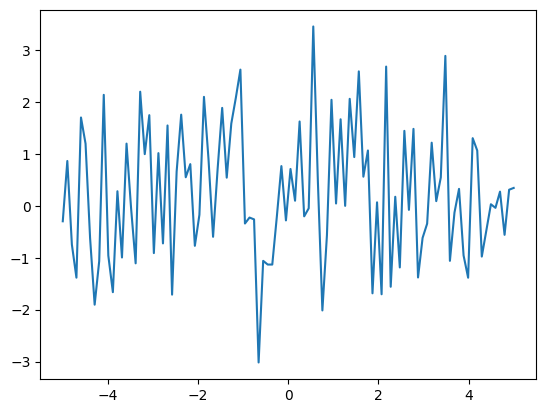

In [21]:
# ガウス過程

gaussian_process = np.zeros(x_len)

for idx_x in range(x_len):
    for mu, e in zip(eig_values, eig_vectors):
        xi = np.random.randn()
        gaussian_process[idx_x] += xi * mu * e[idx_x]
plt.plot(x, gaussian_process)

# Brown運動

ガウス過程を定義すると、確率微分方程式などで重要なBrown運動が定義できます。

---

**定義：Brown運動**

確率過程 $B=(B_t)_{t\geq 0}$が次を満たすとき、Brown運動と言う。

1. $B$はGauss過程
2. $\forall t, s \in [0, \infty), E[B_t] = 0, E[B_tB_s]=t \land s$
3. a.s. $\omega \in \Omega$ に対して、$t \to B_t(\omega)$ は連続

---

ガウス過程では

* 平均関数: $m(t) = E[X_t]$
* 共分散関数: $k(t, t') = E[(X_t - m(t))(X_{t'} - m(t'))]$

について$\mathcal{GP}(m, k)$ と書くことを思い出すと、Brown運動では$m(t)=0$, $k(t, s) = t \land s$になります。


また、Brown運動は次を満たします（逆に次を定義とすることもあります）

1. $B_0 = 0$
2. $B_t$は加法過程
3. $\forall t \geq 0, \forall s > 0$, $B_{t+s} - B_t \sim \mathcal{N}(0, s)$

1と2は証明簡単です。3もガウス過程の定義から、$B_{t+s} - B_t$が平均 $0$のガウス分布に従うことが明らかなのですぐ導出できます。


3を使ってブラウン運動を具体的に構築してみます。

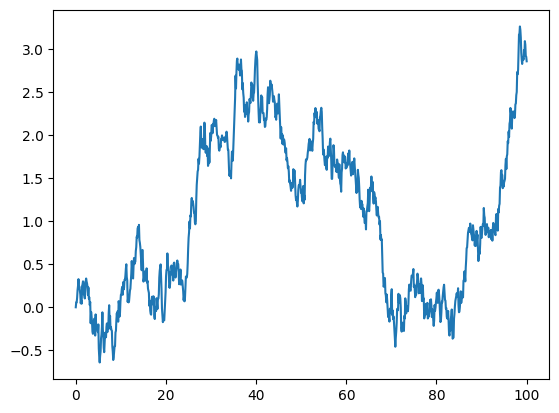

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 1000)
y = np.zeros(1000)

y_sum = 0
for i in range(1000):
    y[i] = y_sum
    y_sum += np.random.randn() * 100 / 1000

plt.plot(x, y)